                                             content        date  like place  \
0  In every walk with nature one receives far mor...  2021-05-17   0.0   NaN   
1  Alice in Earnestland (Ahn Gooc-jin, 2015)#Kore...  2021-05-17   0.0   NaN   
2  볼따구 어쩔거야..-유머 예능 웃긴짤 >>> @haha__yam-#예능 #유머 #유...  2021-05-18   0.0   NaN   
3        #연애의발견-유명한 이별 명장면-#새벽한시_연애의발견ⓒ 연애의 발견, 2014  2021-05-18   0.0   NaN   
4  ㅋㅋㅋㅋㅋㅋㅋㅋㅋ-유머 예능 웃긴짤 >>> @haha__yam-#예능 #유머 #유머...  2021-05-17   0.0   NaN   

                                                tags  
0  ['#이민기 ', '#leeminki ', '#koreandrama ', '#WeL...  
1  ['#KoreanCinema ', '#KoreanFilm ', '#Korea ', ...  
2  ['#예능 ', '#유머 ', '#유머스타그램 ', '#웃긴짤 ', '#개꿀잼 ',...  
3      ['#연애의발견-유명한 이별 명장면-', '#새벽한시_연애의발견ⓒ 연애의 발견']  
4  ['#예능 ', '#유머 ', '#유머스타그램 ', '#웃긴짤 ', '#개꿀잼 ',...  
                                             content        date  like place  \
0  ⠀🎞 Intimate Strangers, 2018🎞 완벽한 타인, 2018⠀⠀✔️드...  2021-05-16     0   NaN   
1                            

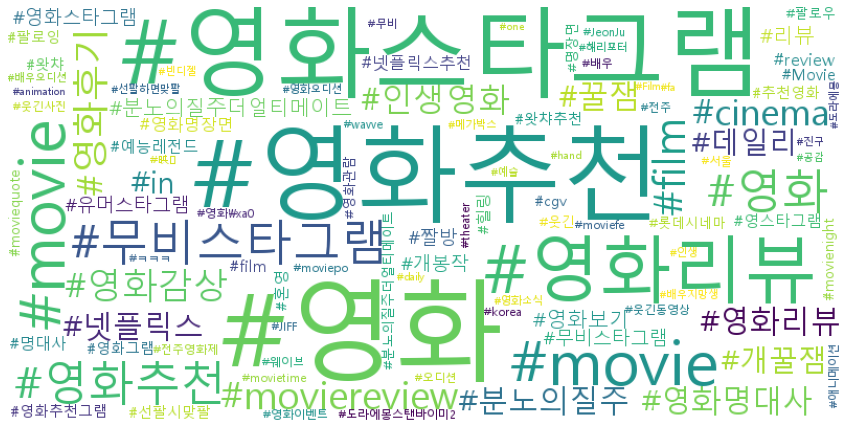

In [4]:
#중복제거
import pandas as pd

movie_insta_df = pd.DataFrame([])

folder = './'
f_list = ['insta_movie_crawling.txt', 
'insta_movie_recommend_crawling.txt','insta_movie_review_crawling.txt']

for f_name in f_list:
    f_path = folder + f_name
    tmp = pd.read_csv(f_path)
    print(tmp.head())
    movie_insta_df = movie_insta_df.append(tmp)

movie_insta_df.columns = ['content', 'date', 'like', 'place', 'tags']

movie_insta_df.drop_duplicates(subset = ['content'], inplace=True)  # inplace=True 옵션을 통해 원본 데이터 변경 
movie_insta_df.to_csv('./movie_crawling.csv', index = False)

#해시태그 수집
import pandas as pd 

raw_total = pd.read_csv('./movie_crawling.csv')

# print(raw_total.head())
# print(raw_total['tags'][:3])

tags_total = []

for tags in raw_total['tags']:
    # print(tags)
    tags_list = tags[2:-2].split("', '") #[' ~ '] 제외
    for tag in tags_list:
        tags_total.append(tag)

#빈도수가 많은 50가지 해시태그 출력 
from collections import Counter

tags_count = Counter(tags_total)
print(tags_count.most_common(50))

dump_words = ['#드라마', '#유머', '#좋아요', '#선팔', '#감성', '#게임', '#글귀', '#회사', '#유튜브', 
'#맞팔', '#예능', '#좋아요반사', '#웃긴짤','#레전드','#오늘의유머','#대유잼','#핵꿀잼','#빵터짐','#강아지','#소통','#일상','#자산어보',
'#럽스타스램','#맞팔해요','#맞팔환영','#소통','#좋반','#이슈']

#print(dump_words)

tags_total_selected = []
for tag in tags_total:
    if tag.strip() not in dump_words:  # strip()을 통해 공백 제거 후 검사
       # print(tag)
        tags_total_selected.append(tag)

tags_counts_selected = Counter(tags_total_selected)

#워드클라우드 출력
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = 'c:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Darwin': # macOS
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

wordcloud = WordCloud(font_path = font_path,background_color='white',
max_words = 100, relative_scaling = 0.3, width = 800,
height = 400).generate_from_frequencies(tags_counts_selected)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./insta_movie.png')
